In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.linear_model import Ridge


In [3]:
def plot_decision_boundaries(X, y, classifier):
    # fuente https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
    Xd = X.values
    yd = y.values
    x_min, x_max = Xd[:, 0].min() - 1, Xd[:, 0].max() + 1
    y_min, y_max = Xd[:, 1].min() - 1, Xd[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xd[:, 0], Xd[:, 1], c=yd, s=20, edgecolor="k")
    plt.show()

In [4]:
#%% Leemos los datos
df = pd.read_csv('medifis2.csv', sep=';', names=['sex', 'height', 'weight', 'foot', 'arm', 'back', 'skull', 'anklee-knee'])

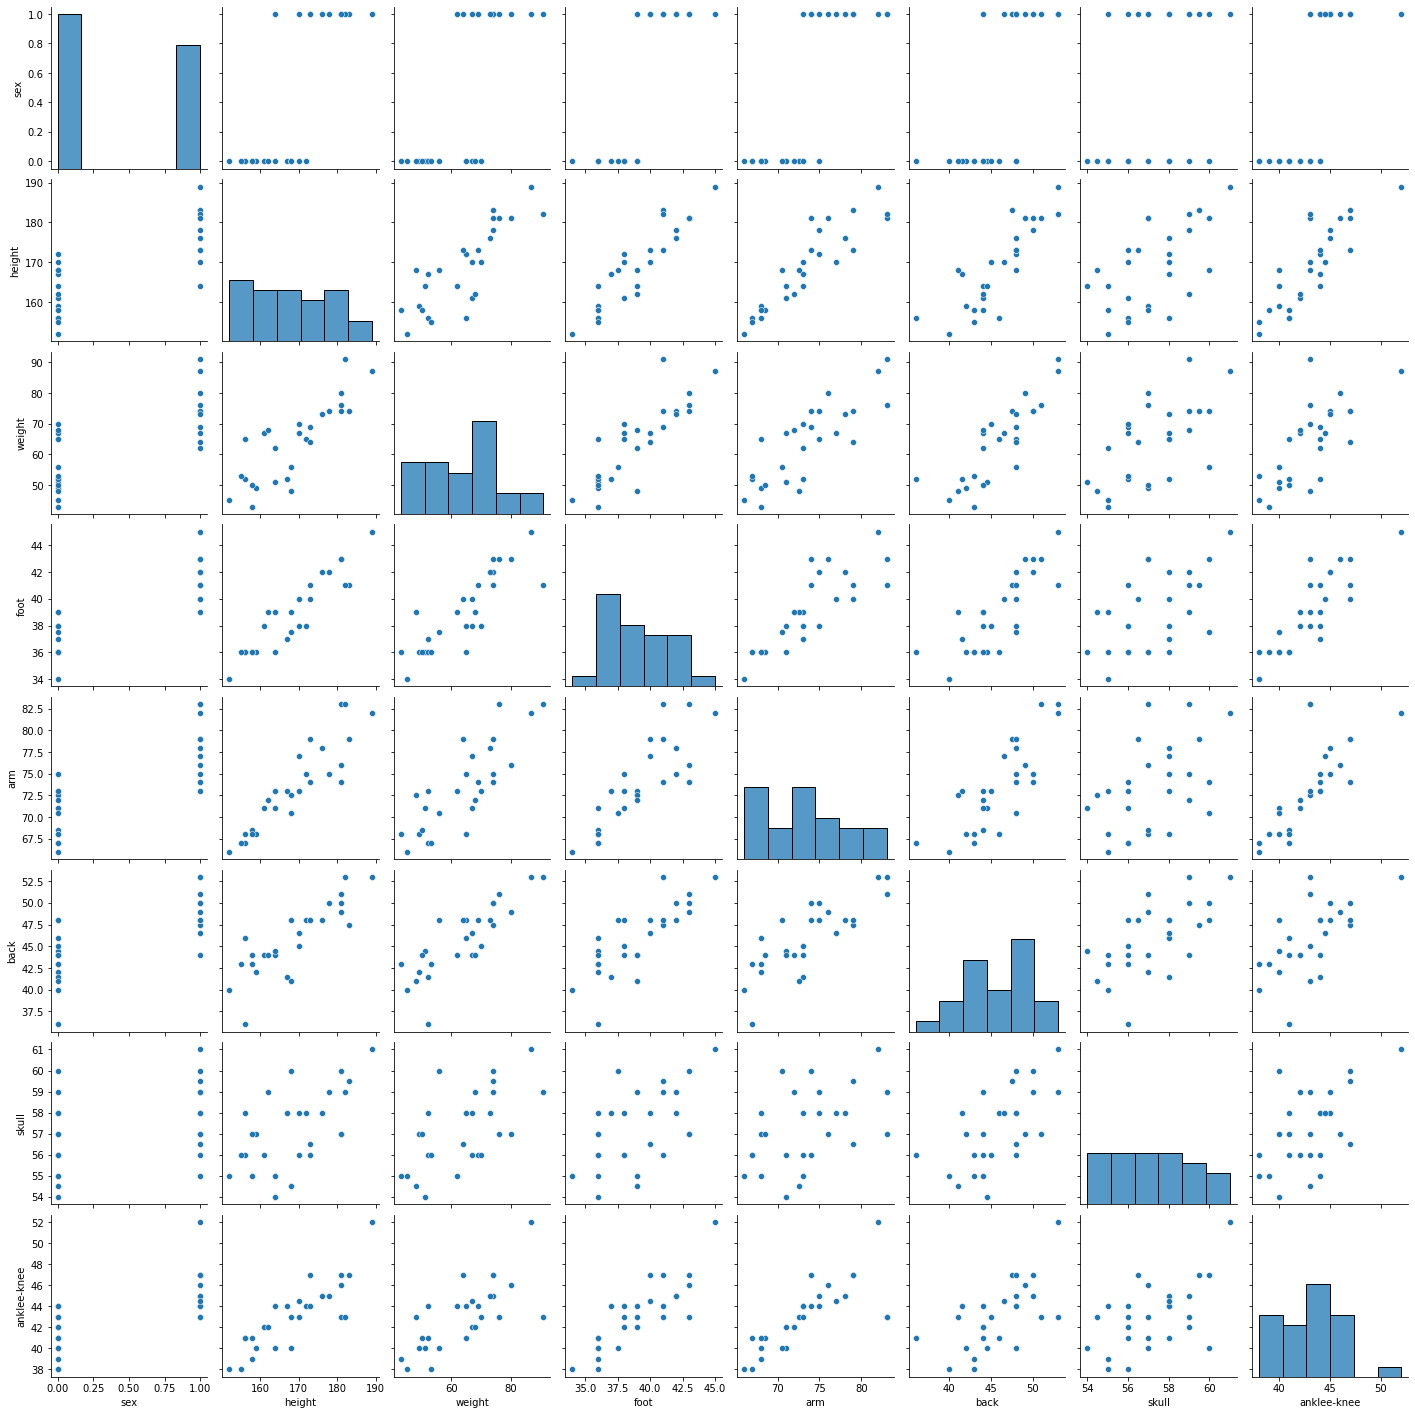

In [5]:
# dibujamos en 2D las nubes de puntos, separados en parejas de características
sns.pairplot(df)

###  Regresion lineal

0.9303970646123756
[-0.09420402  1.42983642  0.73273366  0.49446354  0.34675894  0.50573069]


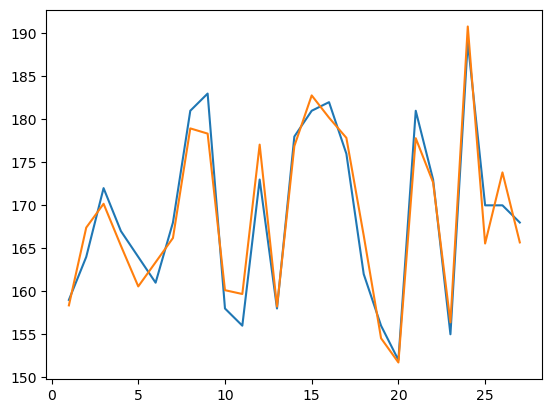

In [6]:
y = df['height'] # Altura, es lo que queremos predecir

X = df[['weight',  'foot', 'arm', 'back', 'skull', 'anklee-knee']] # Falta el sexo porque al ser una variable 
# binaria tiene un tratamiento especial

lr = LinearRegression().fit(X, y) # Llama a la funcion que implementa la regresion lineal y con el .fit
                                  # le damos las variables de entrada y salida para que haga los calculos.
                                  # Los resultados se guardan en el objeto lr
        
# Predice una salida para las X (caracteristicas) que tenemos        
y_pred = lr.predict(X)

plt.figure()
plt.plot(np.arange(1,28), y, np.arange(1,28), y_pred)

# Calculamos el coeficiente de determinacion (R^2)
print(lr.score(X,y)) # Equivalente en clasificacion al % de aciertos que tenemos

# Vemos los coeficientes de regresión
print(lr.coef_) # Son los coeficientes de la regresion. Dicen que variables influyen mas
                # Estaria bien haber escalado antes las variables para que estos coeficientes fueran 
                # representativos. El que es negativo es contraintuivo (encima es el coeficiente del peso)
                # No tiene sentido. Si el peso crece la altura a priori tambien deberia crecer. Ocurre lo de que 
                # es negativo porque esta correlacionada con otras variables. Si el peso crece el resto tb, por 
                # tanto el coef negativo es una pequeña correccion que ha hecho el modelo, pero la influencia del
                # peso esta implicita en el resto de variables

### Variantes Regresion lineal

0.9277774198825344
[0.         1.26631072 0.6775098  0.4086911  0.25130437 0.52373172]


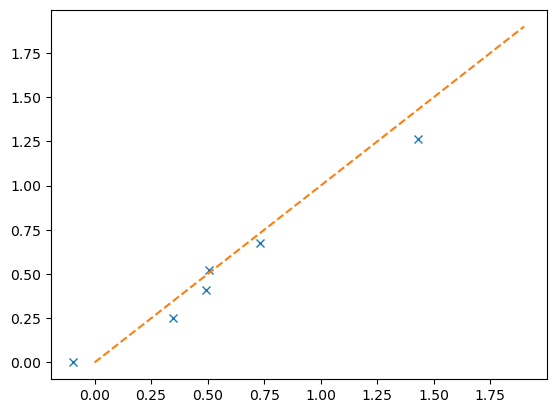

In [7]:
# Calculan la regresion lineal añadiendo una restriccion: que los coeficientes sean todos positivos.
lr2 = LinearRegression(positive = True).fit(X, y)

print(lr2.score(X,y)) # Ha empeorado un poco, lo hace mejor cuando no le pongo restricciones

# Vemos los coeficientes de regresión, ahora son todos positivos (el primero lo ha puesto a cero)
print(lr2.coef_)

# Comparación

plt.figure()
plt.plot(lr.coef_,lr2.coef_,'x',np.arange(0,2,0.1),np.arange(0,2,0.1),'--')

# Si los puntos estuvieran sobre la recta naranja (y=x) seria que los nuevos y los antiguos coeficientes son 
# identicos. Como los puntos azules no estan sobre la recta, es que algo han cambiado los coeficientes.

# Hemos perdido precision (el R2 es peor) pero es mas intuitivo porque no hay coeficientes negativos. Existirá
# una formula lineal que obtiene la altura a partir de los datos de entrada, aunque yo no tengo porque conocerla.
# No me estoy metiendo con este hipotetico modelo realista, estoy trabajando con el modelo matematico que yo creo.
# No implica que mi modelo sea la realidad, por muy bien que la aproxime. Por tanto, el mejor modelo dependera
# de lo que queramos, los dos modelos pueden ser el verdadero o no (segun lo que quiera), si lo que quiero es el
# mejor modelo el verdadero sera el primero, si quiero el mas representativo o intuitivo será el segundo, pero 
# ninguno de los dos es el modelo de la naturaleza que representa la variacion de la altura respecto al resto.

### Regresion ridge

In [8]:
# Exploramos la capacidad de generalización

# Separo train - test, 70% train y 30% test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr3 = LinearRegression().fit(X_train, y_train)

print(lr3.coef_)
print(lr3.score(X_train, y_train)) # Precisión con los datos de entrenamiento, el score da el valor absoluto
print(lr3.score(X_test, y_test))   # Precisión con los datos de test, es lo interesante, lo que me dice si mi 
                                   # modelo es util o no

[-0.12209297  1.48670692  0.68595534  0.60498543  0.18448971  0.48044783]
0.9368076692334245
0.9035800776451467


In [9]:
# Se añade a la formula de la regresión (la de minimizar el sumatorio de y - y estimado al cuadrado) un sumando de
# alfa por beta al cuadrado, donde beta son los coeficientes de la regresión. Ridge nos defiende de la colinealidad,
# de que las variables esten muy relacionadas unas con otras. 

# El efecto de la colinealidad no es tanto que los coeficientes sean negativos, sino que el modelo no es estable,
# los coeficientes entre una ejecución y otra cambian mucho. Con el ridge deben ser mas similares, el ridge da
# una estabilidad que beneficia en el test

ridge = Ridge(alpha=5).fit(X_train, y_train) # alfa = 5, el alfa que esta en la formula de minimización

# Imprimos las puntuaciones iguales que antes para comparar
print(ridge.coef_)
print(ridge.score(X_train, y_train)) # En entrenamiento puede salir peor en el ridge porque no minimiza solo el 
                                     # error, sino el error y el vector w. Sacrifica algo del error para tener un 
                                     # w algo mejor
print(ridge.score(X_test, y_test))

[-0.08680751  1.26040552  0.69280671  0.60477423  0.1327716   0.55940196]
0.9360440044410389
0.9039165030172525


## CLASIFICACIÓN

In [10]:
# CLASIFICACIÓN

# Clasificaré el sexo a partir de dos valores, peso y altura. Solo cojo dos para poder hacer representaciones
# graficas, en la realidad se usarían todas las características
y = df['sex']
X = df[['height', 'weight']]

# Usaremos maquinas de soporte vectorial, las entrenamos

# Esta primera es lineal, intentara separar los puntos con un plano sin más, C es el parametro de configuración
# la inicialización es aleatoria. Se añade el fit para entrenar
svm1 = SVC(kernel='linear', C=1.0, random_state=1).fit(X.values, y.values)

# La segunda se emplea para separar puntos en un círculo y puntos en una corona alrededor de ese 
# círculo. Esto anterior es en el plano x,y. Si defines z = x^2 + y^2, ahora puede separar en altura a través
# de un plano, ya que los de dentro de la circunferencia se quedarán por debajo de z=1 y los de fuera subirán,
# por tanto puedo poner un plano en z=1
svm2 = SVC(kernel='rbf', gamma=0.1, C=10.0, random_state=1).fit(X.values, y.values)


/opt/homebrew/Caskroom/miniforge/base/envs/applemetal/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/applemetal/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.8888888888888888
1.0


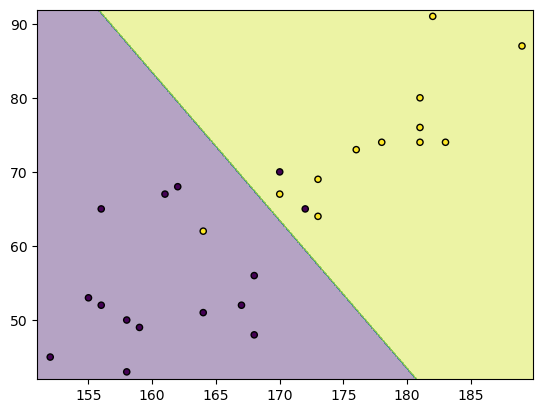

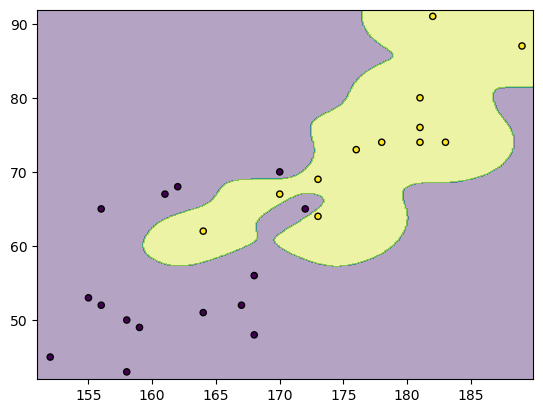

In [11]:
# Evaluamos y representamos los modelos
print(svm1.score(X,y))
print(svm2.score(X,y))

plot_decision_boundaries(X, y, svm1)
plot_decision_boundaries(X, y, svm2)

# El primero tiene menos precisión, el segundo es perfecto.

# El meshgrid del plot_decision_boundaries divide el plano x,y (peso, altura) en un monton de puntos. Para todos
# esos puntos evalúa el clasificador (clafisica todos esos puntos). El clasificador te dice si ese punto es 
# chico o chica. El countourf representa los chicos de un color y las chicas de otro, pudiendo ver así las 
# fronteras de clasificación entre las dos clases. También dibuja los puntos que hemos usado para entrenar para 
# ver si caen en la región correcta.

# Es verdad que el segundo consigue un 100%, pero está muy ajustado a los datos, si le meto otros datos no tiene
# por qué funcionar bien porque está muy ajustado a los datos

0.8888888888888888
1.0


/opt/homebrew/Caskroom/miniforge/base/envs/applemetal/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/applemetal/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


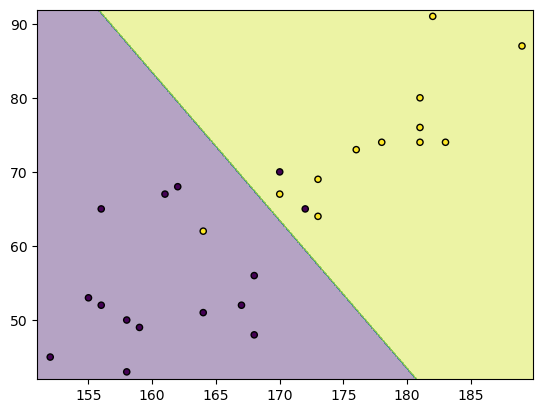

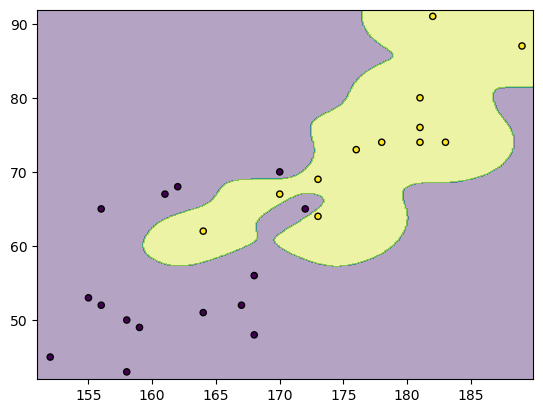

In [12]:
'''
1. Usar varias configuraciones (al menos tres) del clasificador SVC y evaluarlas y compararlas sin validación cruzada
'''

# Probamos al cambiar la gamma
svm1 = SVC(kernel='linear', C=1.0, random_state=1).fit(X.values, y.values)
svm2 = SVC(kernel='rbf', gamma=0.1, C=10.0, random_state=1).fit(X.values, y.values)

print(svm1.score(X,y))
print(svm2.score(X,y))
plot_decision_boundaries(X, y, svm1)
plot_decision_boundaries(X, y, svm2)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

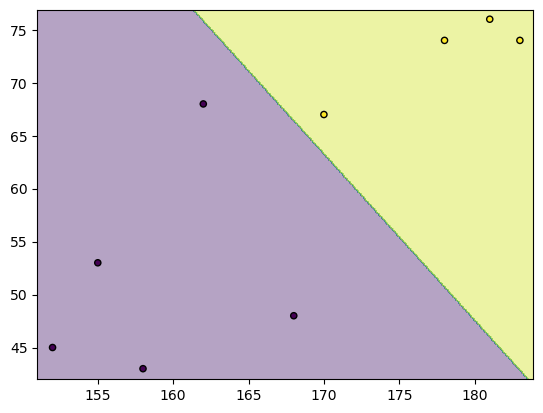

1.0


In [14]:
svm1 = SVC(kernel='linear', C=1.0, random_state=1).fit(X_train.values, y_train.values)
plot_decision_boundaries(X_test, y_test, svm1)
print(svm1.score(X_test.values, y_test.values))


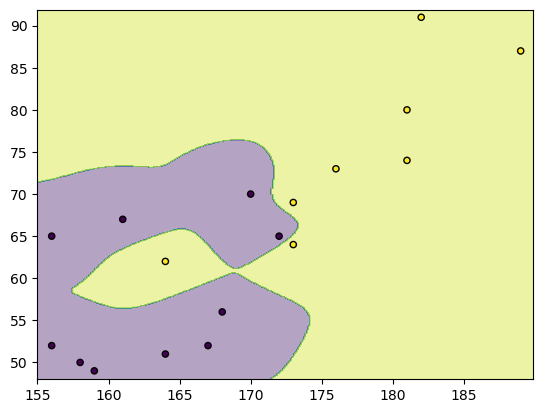

1.0
0.7777777777777778


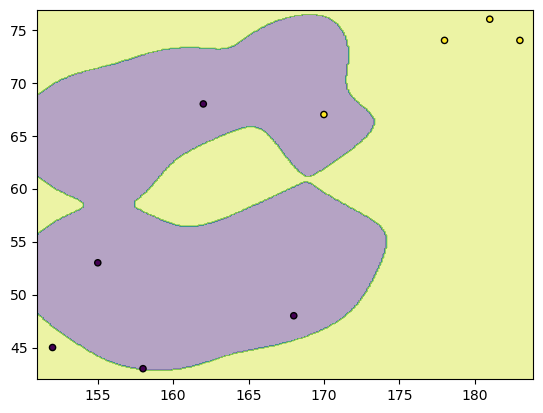

In [15]:
svm3 = SVC(kernel='rbf', gamma=0.1, C=10.0, random_state=1).fit(X_train.values, y_train.values)

plot_decision_boundaries(X_train, y_train, svm3)
print(svm3.score(X_train.values, y_train.values))
print(svm3.score(X_test.values, y_test.values))
plot_decision_boundaries(X_test, y_test, svm3)

In [ ]:
# Aqui vemos que el modelo lineal acaba siendo mejor, porque en test es superior, no se ha ajustado tanto a los 
# datos.

## Arboles de decisión

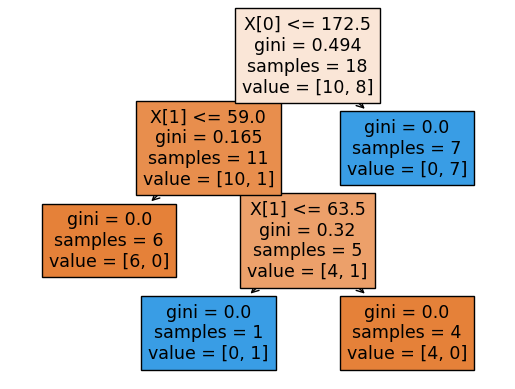

In [16]:
'''
Random tree
'''

from sklearn import tree

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

tree_model.fit(X_train.values, y_train.values)

plt.figure()

_ = tree.plot_tree(tree_model, filled=True) # https://mljar.com/blog/visualize-decision-tree/

# Se ven las preguntas, si la altura es menor que 172.5 cm, si el peso es menor que 59... Lo bueno de los árboles
# es que son interpretables, sé lo que estan haciendo. Para una aplicación médica es muy bueno. La función de 
# coste es Gini, que es el sumatorio de la probabilidad de cada clase por (1- la probabilidad de la clase). Se
# quiere minimizar gini

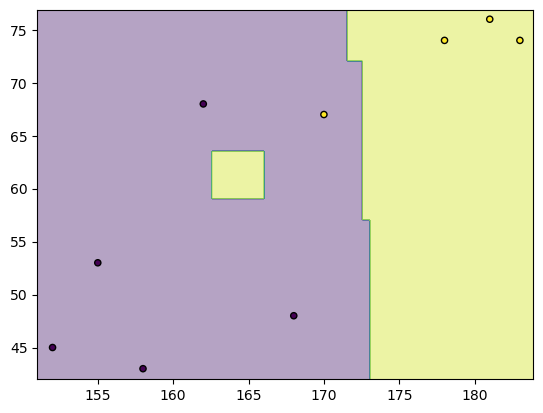

In [17]:
# Mete cierta aleatoriedad en el árbol, en la practica los forest funcionan algo mejor
forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2)

forest.fit(X_train.values, y_train.values)
plot_decision_boundaries(X_test, y_test, forest)


### Perceptrón multicapa

0.7222222222222222
0.8888888888888888


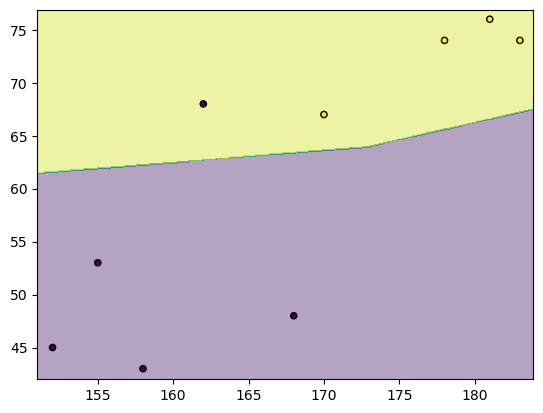

In [18]:
# Una red con 5 neuronas en una capa y 2 en la siguiente
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,12), random_state=1)
mlp.fit(X_train.values, y_train.values)

print(mlp.score(X_train.values,y_train.values))
print(mlp.score(X_test.values,y_test.values))
plot_decision_boundaries(X_test, y_test, mlp)

### Clustering con K-MEANS

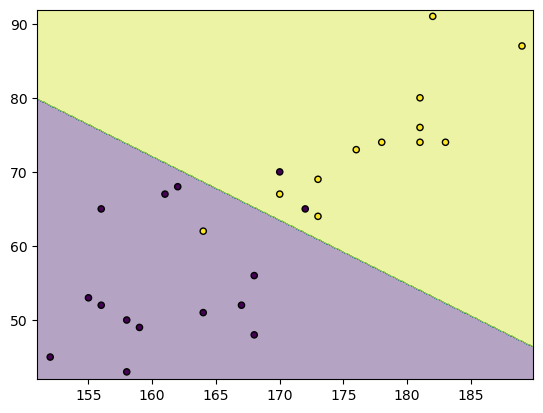

Para  nclusters =  2  score=  0.522027874071964
Para  nclusters =  3  score=  0.49045834612949823
Para  nclusters =  4  score=  0.4849350084542592
Para  nclusters =  5  score=  0.48176311903052715
Para  nclusters =  6  score=  0.5323414262683448
Para  nclusters =  7  score=  0.5216212107474646
Para  nclusters =  8  score=  0.48559459650764536
Para  nclusters =  9  score=  0.43232046832283594


In [19]:
# Funciona muy bien si las clases están bien separadas, no tanto si estan mezcladas. Lo bueno es que no necesita
# las etiquetas. El problema de los métodos no supervisados es que a priori no sabes cuantas clases hay, por tanto
# no sabes cuantos grupos decirle que busque

kmeans = KMeans(n_clusters=2)
kmeans.fit(X.values) # Es no supervisado, no se le dan las etiquetas
plot_decision_boundaries(X, y, kmeans)

for nclusters in  np.arange(2,10):
    kmeans = KMeans(n_clusters=nclusters)
    cluster_labels = kmeans.fit_predict(X.values)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para  nclusters = ", nclusters," score= ", silhouette_avg)
